# Read Library

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle
%matplotlib inline

# Read Dataset for train, test, and verification (QODE)

In [74]:
# dataset best case a2cloud score 
df_train = pd.read_csv("standalone_balanced_a2cloudscore.csv")

# QODE verification dataset  
df_QODE= pd.read_csv("standalone_balanced_a2cloudscore_QODE_runtime_verfi.csv")

df_train

,a2cloud_score,Cost(per hour USD),Instance
0,3.728346,0.0928,t2.large
1,5.071407,0.0832,B2ms
2,4.942641,0.0950,N1s2
3,6.261005,0.0150,Lin.G
4,2.452133,0.1000,c4.large
...,...,...,...
235,3.697601,0.0230,t2.small
236,2.391436,0.0752,t3a.large
237,3.555449,0.0376,t3a.medium
238,10.000000,0.0188,t3a.small


### Length calculation 

In [75]:
length=df_train.shape
len_train=round(length[0]*0.8)  # 80% of total dataset 
len_test=length[0]-len_train

### Shuffle Training dataset

In [76]:
df_train = shuffle(df_train)
df_train = shuffle(df_train)
df_train=df_train.append(df_QODE) # add verification: Kmeans and plot purposes 

### Data Visualization

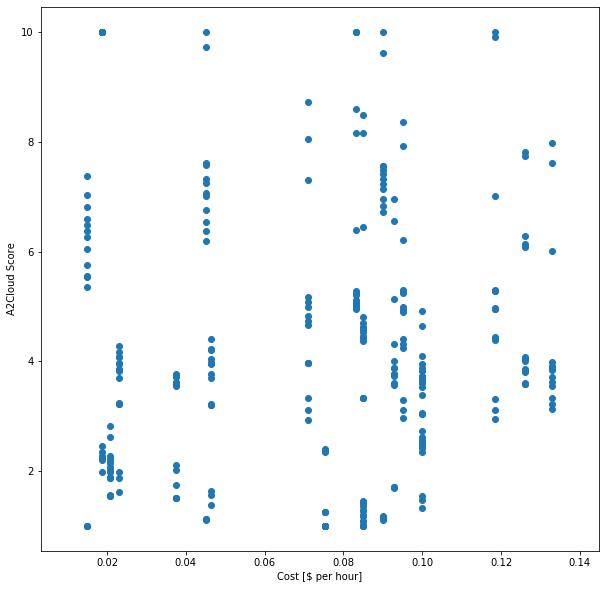

In [77]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')
plt.show()

# K Means

In [78]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 1, 0, 0, 1,
       0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 3,
       3, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 3, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 3, 0, 1, 1, 3, 0, 3, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 0, 3, 0, 0, 3, 2, 3, 1, 3, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 3, 2, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3, 2, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3,
       3, 3, 0, 3, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 3,
       3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1], d

In [79]:
df_train['cluster']=labels # add cluster column to dataset 

### Data Visualization


Text(0, 0.5, 'A2Cloud Score')

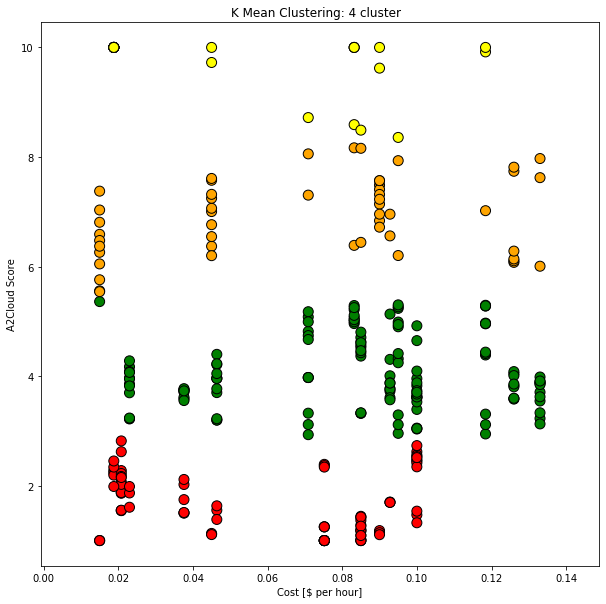

In [80]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad


In [81]:
df_train.tail(10)

,a2cloud_score,Cost(per hour USD),Instance,cluster
50,10.000000,0.1184,N1M2,2
51,7.568714,0.0900,Lin.M,3
52,1.092361,0.0850,c5.large,1
53,1.325206,0.1000,m4.large,1
54,1.385623,0.0464,t2.medium,1
55,1.608541,0.0230,t2.small,1
56,1.000000,0.0752,t3a.large,1
57,1.748019,0.0376,t3a.medium,1
58,1.987044,0.0188,t3a.small,1
59,2.151279,0.0208,t3.small,1


In [82]:
#dataset save as csv file
df_train.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},7)
df_new=df_new.replace({'cluster':1},8)
df_new=df_new.replace({'cluster':2},5)
df_new=df_new.replace({'cluster':3},6)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)



In [83]:
df_new.head(10)


,a2cloud_score,Cost(per hour USD),Instance,cluster
0,7.575632,0.0450,Lin.C,2
1,6.809114,0.0150,Lin.G,2
2,2.071931,0.0208,t3.small,4
3,3.700639,0.0464,t2.medium,3
4,3.728346,0.0928,t2.large,3
5,4.960293,0.0832,B2ms,3
6,6.371554,0.0450,Lin.C,2
7,4.627269,0.0850,F2s,3
8,5.025384,0.0832,B2ms,3
9,3.774273,0.0928,t2.large,3


In [84]:
df_new.tail(10)


,a2cloud_score,Cost(per hour USD),Instance,cluster
290,10.000000,0.1184,N1M2,1
291,7.568714,0.0900,Lin.M,2
292,1.092361,0.0850,c5.large,4
293,1.325206,0.1000,m4.large,4
294,1.385623,0.0464,t2.medium,4
295,1.608541,0.0230,t2.small,4
296,1.000000,0.0752,t3a.large,4
297,1.748019,0.0376,t3a.medium,4
298,1.987044,0.0188,t3a.small,4
299,2.151279,0.0208,t3.small,4


In [85]:
df_train=df_new

# Training NB

In [86]:
xtrain=df_train[['a2cloud_score','Cost(per hour USD)']]
xtrain=xtrain[0:len_train]
ytrain=df_train['cluster'].values.tolist()
ytrain=ytrain[0:len_train]

In [87]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing NB 

In [88]:
xtest=df_train[['a2cloud_score','Cost(per hour USD)']]
xtest=xtest[len_train:length[0]]
b=df_train['cluster'].values.tolist()

y_actual=b[len_train:length[0]]


In [89]:
y_pred = classifier.predict(xtest)


In [90]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 97.91666666666666 %


In [91]:
print(confusion_matrix(y_pred, y_actual))


[[ 4  0  0  0]
 [ 0  4  0  0]
 [ 0  0 26  1]
 [ 0  0  0 13]]


In [92]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      0.96      0.98        27
           4       0.93      1.00      0.96        13

    accuracy                           0.98        48
   macro avg       0.98      0.99      0.99        48
weighted avg       0.98      0.98      0.98        48



In [93]:
df_train.tail(10)

,a2cloud_score,Cost(per hour USD),Instance,cluster
290,10.000000,0.1184,N1M2,1
291,7.568714,0.0900,Lin.M,2
292,1.092361,0.0850,c5.large,4
293,1.325206,0.1000,m4.large,4
294,1.385623,0.0464,t2.medium,4
295,1.608541,0.0230,t2.small,4
296,1.000000,0.0752,t3a.large,4
297,1.748019,0.0376,t3a.medium,4
298,1.987044,0.0188,t3a.small,4
299,2.151279,0.0208,t3.small,4


### Plot Confusion Matrix 

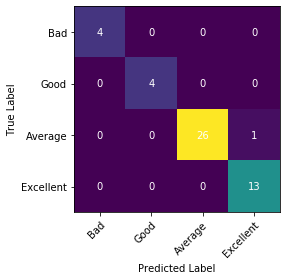

In [94]:

a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

# QODE VERIFICATION

In [95]:
# read qode dataset 
x_qode=df_QODE[['a2cloud_score','Cost(per hour USD)']]


In [96]:
# make predictions 
y_pred = classifier.predict(x_qode)

# read actual output value from dataset 
y_actual=b[240:300]

In [97]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 86.66666666666667 %


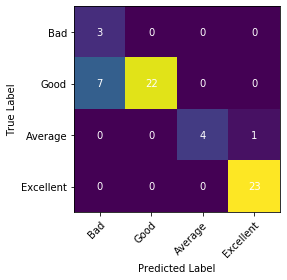

In [98]:
a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [99]:
y_pred

array([2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4])

In [100]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       0.30      1.00      0.46         3
           2       1.00      0.76      0.86        29
           3       1.00      0.80      0.89         5
           4       0.96      1.00      0.98        23

    accuracy                           0.87        60
   macro avg       0.81      0.89      0.80        60
weighted avg       0.95      0.87      0.89        60



# Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]

In [133]:
# Input from user 

A2Cloud_score = float(input(' A2Cloud Score (1 to 10): '))
cost = float(input('Cost of instance (per hour): '))

def Prediction(A2Cloud_score,cost):
    y_pred = classifier.predict((np.array([A2Cloud_score,cost])).reshape(1, -1))[0]
    return y_pred
    

guess_cluster=Prediction(A2Cloud_score,cost) 

training=df_train[0:len_train]

training=training[training['cluster']==guess_cluster]


 A2Cloud Score (1 to 10): 2
Cost of instance (per hour): 2


In [142]:
instance=training['Instance'].unique()
instance

array(['Lin.C', 'Lin.G', 'Lin.M', 'E2s'], dtype=object)

In [140]:
training

,a2cloud_score,Cost(per hour USD),Instance,cluster
0,7.575632,0.045,Lin.C,2
1,6.809114,0.015,Lin.G,2
6,6.371554,0.045,Lin.C,2
16,7.141438,0.090,Lin.M,2
25,6.261005,0.015,Lin.G,2
43,6.589029,0.015,Lin.G,2
44,6.838046,0.090,Lin.M,2
64,6.765125,0.045,Lin.C,2
77,7.004490,0.045,Lin.C,2
89,7.064559,0.045,Lin.C,2
